- Fork from: https://www.kaggle.com/startupsci/titanic-data-science-solutions
- Competition: https://www.kaggle.com/c/titanic

# Titanic Data Science Solutions (Japanese ver.)


### このノートブックは，[Data Science Solutions](https://www.amazon.com/Data-Science-Solutions-Startup-Workflow/dp/1520545312) に関係しています. 

このノートブックでは，Kaggleのようなサイトにあるデータサイエンスコンペを解くための典型的なワークフローを一通り説明します．

いくつかの同様の素晴らしいノートブックがありますが，その多くは"ExpertがExpertのために作った"ようで，「その解決法がどのように構築されたのか」という点に対する説明がスキップされています．
このノートブックの目的は，ワークフローの各ステップを順に追い，それぞれのステップを説明すると共に，問題解決の際に我々(Kaggle上級者)がとった全ての決定に対する理論的根拠を説明することです．

## ワークフローの各ステージ

コンペに対するワークフローは，"Data Science Solutions book"で述べられている7つのステージからなります．

1. 問いかけ/要件の定義． (Question or problem definition．)
2. train/testデータの取得． (Acquire training and testing data.)
3. データの補完，準備，整頓． (Wrangle, prepare, cleanse the data.)
4. パターンの特定/分析 および データの探索/調査． (Analyze, identify patterns, and explore the data.)
5. モデル，予測，問題解決(Model, predict and solve the problem.)
6. 問題解決にいたる各ステップと結論の可視化，伝達，説明 ．(Visualize, report, and present the problem solving steps and final solution.)
7. 結果の提供/提出． (Supply or submit the results.)

このワークフローは，「どのようにして，各ステージが他ステージを相補するか」に対する一般的な流れを提示していますが，例外的なユースケースもあります．

- 複数のワークフロー・ステージを結合してもよい．データ可視化によって分析してもよい．
- 提示されたものよりも簡単に，ステージを実行する．データ補完の前後にデータ分析をしてもよい．
- ワークフローの中で，ステージを複数回実行する．ステージを可視化することは，複数回行われてもよい．
- あるステージを完全にやめる．コンペのデータセットを商品化/サービス化するためのステージを提供する必要はないかもしれない．


## 問いかけ/要件の定義

Kaggleのようなコンペ・サイトは，解決すべき問題や，モデルを訓練するためのtrainデータを提供するとき，およびモデルの予測結果をtestデータに対して検証するときに，問いかける質問を定めます．
"Titanic Survival competition"における問題/質問の定義は，[Kaggleで次のように述べらています．](https://www.kaggle.com/c/titanic).

> タイタニック号事故に生存したor生存しなかった乗客を表形式にまとめたサンプルのtrainデータセットから，我々のモデルは，生存情報を含まないtestデータセットに基づいて，"testデータセットの乗客が生存したかor生存しなかったか"，を決定することができる． <br><br> Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.


我々は，問題の領域についての簡単な理解を構築したいとも思うかもしれません．これについては，[Kaggle competition description page](https://www.kaggle.com/c/titanic)で述べられています．
以下は，特筆すべきハイライトです．

- 1912/4/15，初めての航海で，タイタニック号は氷山に衝突した後に沈没した．2224名の乗客/船員のうち1502名が死亡しました．すなわち32%の生存率です．
- このような人命事故をまねいた難破の1つの理由は，乗客/船員のための十分な数の救命ボートがなかった点です．
- 沈没から生存することには運の要素もあるものの，女性・子供・上流階級などのグループは他よりも生存しやすかったようです．


## ワークフローの目標

データサイエンス・ワークフローは7つの主要目標を解決します．

- **分類する(Classifying)** <br>
我々はサンプルデータを分類/カテゴライズしたいと思うことでしょう．また，我々は異なるクラスどうしの背後関係or相関関係を理解したいと思うことでしょう．

- **関連づける(Correlating)** <br>
trainデータセットの中で利用可能な特徴量に基づいて問題にアプローチできます．データセットの中で，どの特徴量が我々の目標変数(Survived)に対して意義深く貢献するのか？統計的には，統計量と目標変数(Survived)との間に[相関関係(Correlation)](https://en.wikiversity.org/wiki/Correlation)がないでしょうか？特徴量の値が変わるならば，解決状態も変わるのでしょうか？これは与えられたデータセットの中で数値変数/カテゴリ変数の両方に対して検証されます．
ワークフロー・ステージとその次の目標のために，我々は，"生存したか"以外の特徴量の中の相関関係を決定したいと思うことでしょう．特徴量を作成・補完・訂正する際に，ある特徴量を相関させることが役立つでしょう．

- **変換する(Converting)** <br>
モデリングを行う段階では，データを前処理する必要があります．モデル・アルゴリズムの選択に依存して，すべての特徴量を数値的に等しい値に変換させる(正規化する)必要があるかもしれない．たとえばテキスト・カテゴリ変数を数値変数に変換します．

- **補完する(Completing)** <br>
データの前処理として，特徴量の中のすべての欠損値を推定する必要があります．モデル・アルゴリズムは欠損値がない場合に最もよく働くでしょう．

- **訂正する(Correcting)** <br>
我々は，特徴量の中で欠損値or不正な値のために，trainデータセットを分析するでしょうし，これらの値を訂正しようとするor欠損をもつサンプルを排除しようとするでしょう．
これを行うための1つの方法は，サンプルor特徴量の中のすべての外れ値を区別することです．また，もしある特徴量が分析に寄与しないor結果を有意に歪めるかもしれないならば，我々はその特徴量を完全に捨てるでしょう．

- **作成する(Creating)** <br>
新しい特徴量が相関関係・変換・完全性に従うように，我々は既存の特徴量or特徴量集合から新しい特徴量を作成することができます．

- **可視化(Charting).** <br>
どのように正しい可視化の描画/図表を選択するかは，データの性質と目標変数(Survived)に依存します．

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/uchiumi/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


## データを取得

PythonのPandasパッケージはデータセットの処理することに役立ちます．まず，train/testデータセットをPandas DataFrameとして取得します．また，一定の処理のために，両方のデータセットを結合します．

In [2]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
combine = [train_df, test_df]

## 要約統計量による分析

Pandasは，次の問いに簡単に答えるようにデータセットを要約することに役立ちます．

> ***データセットの中で，どの特徴量が利用可能なのか?***

特徴量を直接操作/分析するために，特徴量の名前を記録しておきます．これらの特徴量の名前は，[Kaggle data page](https://www.kaggle.com/c/titanic/data)で述べられています.

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


> ***どの特徴量がカテゴリカル変数か?***

これらの変数はサンプル全体を似たようなサンプル集合に分類します．
カテゴリカル変数において，それぞれの特徴量は，名義・順序・比例・間隔のうちどの尺度に基づいているでしょうか？
これは我々が可視化において適切なプロットを選択することに役立ちます．

- カテゴリカル変数: Survived, Sex, and Embarked. Ordinal: Pclass.

> ***どの特徴量が数値変数か?***

どの特徴量が数値的でしょうか?数値変数の値はサンプル間で異なります．数値変数において，それぞれの特徴量は離散・連続・時系列のうちどれに基づいているでしょうか？
これは我々が可視化において適切なプロットを選択することに役立ちます．

- 連続変数: Age, Fare. Discrete: SibSp, Parch.

In [4]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> ***どの特徴量が混合データ型なのか？***

同じ特徴量の中の数値型/アルファベット+数値型のデータ．目標を修正するための候補がある．

- Ticketは数値型&アルファベット型の混合です．Cabinはアルファベット型です．

> ***どの特徴量が欠損値/誤植を含んでいるの？***

これは，大きいデータセットに対してレビューを行うことは大変ですが，より小さいデータセットからの少量のサンプルの場合は，レビューを行うことで「どの特徴量が修正を必要とするのか」が即座にわかります．

- 代理名/省略名のために使われるタイトル，丸括弧，クオーツを含む名前を記述するための方法がいくつかあるため，Nameは欠損値/誤植を含んでいます．

> ***どの特徴量が，空白(blank)/無効な値(null) or 空値(empty)なのか？***

これらは修正が必要となります．

- Cabin > Age > Embarked の順で，trainデータセットの特徴量は多くのnull値を含んでいます．
- Cabin > Age の順で，testデータセットの特徴量は欠損値を含んでいます．

> ***多様な特徴量のためのデータ型は何か？***

目標変数を変換する際に役立ちます．

- trainデータセットのうち，7つの特徴量はint型またはfloat型です．testデータセットでは６つです．
- 5つの特徴量はstring型(object型)です．

In [5]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

> ***サンプルにわたって，数値型の特徴量の分布は何か？***

実際の問題領域のtrainデータセットはどれくらい(母集団を)"表現"しているのか？
This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

- trainデータセットのサンプルサイズは891．これはタイタニック号に乗船していた実際の人数の40%に相当する．
- Survivedは，0 or 1のカテゴリカル変数．
- trainデータセットのサンプルの約38%は生存していました．これは実際の生存率である32%を表現している．
- ほとんどの乗客 (> 75%) は両親や子供と共に旅行していなかった．
- 30%近い乗客は，兄弟/配偶者と共に乗船していた．
- \$512よりも高い運賃を払っている乗客 (< 1%) の中では，運賃が有意に変化していた．
- 65歳-88歳の高齢者 (< 1%) がいる．

In [6]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> ***カテゴリカル変数の分布は何か？***

- Namesは，trainデータセット全体にわたって固有． (count=unique=891)
- Sexは，2つの正数として表され，65%は男性． (top=male, freq=577/count=891)
- Cabinは，trainデータセット全にわたって，いくつかのサンプルで重複がある．すなわち，いくつかの乗客はキャビンを共有していた．
- Embarkedは，3つの正数をとる．ほとんどの乗客によってSポートが使われていた． (top=S)
- Ticketは，重複する値の比率が高い (22 %, unique=681)

In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Cherry, Miss. Gladys",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


## データ分析に基づく想定

我々は，データ分析が今まで行ってきたことに基づいて，以下の想定にたどり着きます．我々は，適切な行動をとる前に，これらの想定をさらに検証するかもしれません．

**Correlating.**

それぞれの特徴量がSurvivalとどの程度強く相関しているかを知りたいです．この即座にわかる相関関係と，モデル化された相関関係を後半で一致させます．

**Completing.**

1. Ageを補完したい．AgeはSurvivalと間違いなく相関している．
2. Embarkedを補完したい．EmbarkedはSurvivalや他の重要な特徴量と相関しているであろう．

**Correcting.**

1. Ticketは分析から除外される．Ticketは重複率が高く(22 %)，またTicketとSurvivalには相関関係がないかもしれない．
2. Cabinは分析から除外される．Cabinは，train/test両方のデータセットで空値が多く，また多くのnull値を含んでいる．
3. PassengerIdは除外される．PassengerIdはSurvivalに寄与しない．
4. Nameは除外される．Nameは比較的標準的ではない変数で，Survivalに直接寄与しないかも入れない．

**Creating.**

1. Familyという新しい特徴量を作成する．これはParchとSibSpに基づいていて作られ，各サンプルの家族の合計数を表す．
2. engineerという新しい特徴量を作成する．これはTitleを抜粋した特徴量である．
3. Age bandsという新しい特徴量を作成する.これは連続数値変数Ageを順序カテゴリカル変数にする．
4. Fare rangeという新しい特徴量を作成する．(もし分析に役立つならば)

**Classifying.**

先ほど述べられた問題の記述に基づいて，以下を我々の想定に追加する．

1. 女性 (Sex=female) は生存しやすかった．
2. 子供 (Age < ?) は生存しやすかった．
3. 上流階級の乗客 (Pclass=1) は生存しやすかった．

## Analyze by pivoting features

データに対する観察/想定を確認するために，それぞれの特徴量を互いにピボットすることで，我々は特徴量の相関関係を即座位に分析することができる．
我々はこの段階では，空の値をもたない特徴量に対してのみ以下を実行する．これは，カテゴリカル型 (Sex)， 順序型 (Pclass)，離散型 (SibSp, Parch)の特徴量に対してのみ意味をなす．

- **Pclass** Pclass=1とSurvivedの間に有意な相関関係 (> 0.5) を観測する．よって，Pclassをモデルに使われる特徴量として決定する．(classifying #3)
- **Sex** 問題の定義をする際に，女性(Sex=female)のサンプルは生存率が高い(74 %)ことを観測する．(classifyingの #1)
- **SibSP, Parch** これらの特徴量は，ある特徴量との相関係数が0となる．これらの個々の特徴量から，ひとつの特徴量(もしくはその集合)を求めることがベストだろう．(creating #1).

In [8]:
# Pclass(乗客の階級)ごとの生存率
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
# Sex(乗客の性別)ごとの生存率
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
# SibSp(乗客の兄弟/配偶者)ごとの生存率
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
# Parch(乗客の両親/子供)ごとの生存率
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## データ可視化による分析

さて，データ分析のための可視化を使って，我々の想定の確認を続けましょう．

### 数値型変数の修正

数値型変数と目標変数(Survived)との相関関係を理解することによって，可視化をはじめましょう．


ヒストグラムは，Ageのような連続数値型変数の分析に対して有用です．Ageの値に従ってサンプルをまとめる/整列させることは，有益なパターンの特定することに役立ちます．
ヒストグラムは，自動的に定義されるbins(分割数)/range band(分割幅)を使い，サンプルの分布を提示することができます．
これによって，我々がAgeの特定の幅に関係する質問に答えることが容易になります．(ex. 乳幼児の生存率はよかったのか？)

※ ヒストグラムのx軸は，サンプルや乗客たちの総数を表すことに注意する．

**観察**

- 乳幼児 (Age <=4) は高い生存率だった．
- 最も高齢な乗客たち (Age = 80) は生存した．
- 15-25歳の乗客たちの多くは生存しなかった．
- ほとんどの乗客は，15-35歳の範囲にあった．

**決定**

この簡単な分析は，ワークフローの次の段階に対する決定として，以下の想定を承認します．

- Ageはモデルの訓練に使うべきである． (classifying #2) 
- Ageのnull値を補完するべきである． (completing #1)
- Ageをグループとしてまとめるべきである． (creating #3)

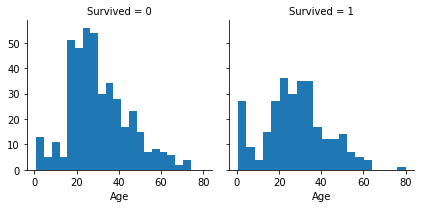

In [12]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### 相関関係 (数値変数-順序変数)

1つのプロットを使って相関関係を特定するために複数の特徴量を結合することができます．これは数的な値をとる数値変数/カテゴリカル変数によって片付けられます．

**観察**

- Pclass=3の乗客がほとんどですが，そのほとんどは生存しなかった．我々の想定が確認された． (classifying #2)
- Pclass=2とPclass=3の乳幼児の乗客はほとんど生存した．よって我々の想定は定量化した． (classifying #2)
- Pclass=1の乗客のほとんどが生存した．我々の想定が確認された． (classifying #3)
- Pclassは乗客の年齢(Age)の分布によって変化する．

**決定**

- モデルの訓練のためにPclassを考慮する．

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


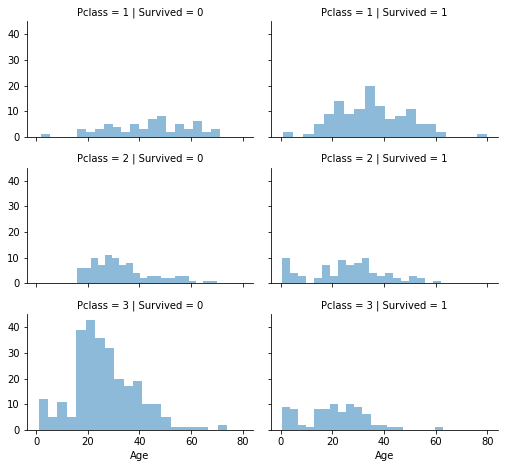

In [13]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### 相関関係 (カテゴリカル変数-カテゴリカル変数)

カテゴリカル変数と目標変数(Survived)との相関関係をみることができます．

**観察**

- 女性の乗客は，男性の乗客よりも良い生存率をもっていた． (classifying #1)
- Embarked=Cの中には，高い生存率をもつ男性という例外もいた．これはPclassとEmbarkedの間の相関になるし，PclassとSurvivedとの相関関係につながる．EmbarkedとSurvivedとの直接的な相関関係は必ずしも必要ない．
- Pclass=3の女性は，Pclass=2 (C, Qポート) と比較して，良い生存率をもっていた． (completing #2)
- Pclass=3の男性の中で，Embarked(乗船ポート)は生存率を変化させていた． (Correlating #1)

**決定**

- Sexをモデルの訓練に追加する
- Embarkedの欠損値を補完し，モデルの訓練に追加する．

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


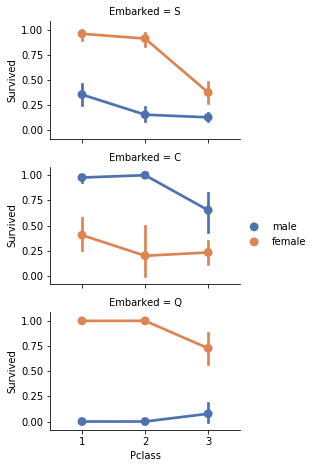

In [14]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### 相関関係 (カテゴリカル変数-数値変数)

カテゴリカル変数と数値変数の相関関係を知りたいでしょう．<br>
Embarked(カテゴリカル変数)，Sex(カテゴリカル変数)，Fare(数値変数)とSurvived(カテゴリカル変数)との相関関係を考慮できます．

**観察**

- 高い運賃を払っていた乗客は，良い生存率だった． (creating #4)
- 乗客ポート(Embarked)は生存率と相関がある． (correlating #1 / completing #2) 

**決定**

- Fareをまとめた特徴量を考慮する．

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


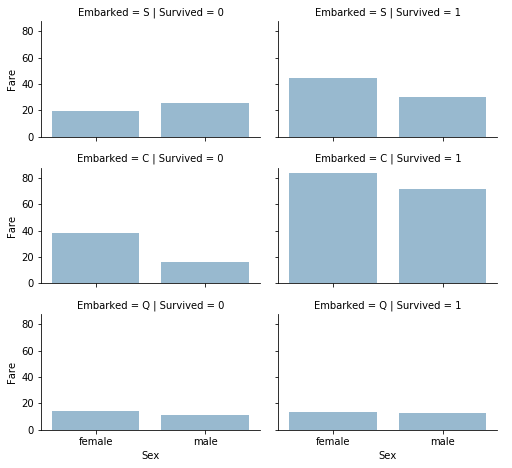

In [15]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## データを飼いならす

データセットと要求される問題解決について，いくつかの想定と決定を集計しました．

今までのところ1つの特徴量/変数を変えなければいけないことはなかったのです．
ここで，データの修正(correcting)・作成(creating)と目標達成に対する想定と決定を実行しましょう．

### データ修正 (特徴量を削除する)

少ないデータ点で処理する特徴量を排除することは，実行する最初の目標です．ノートブックを加速化させ，分析を軽減させます．

想定と決定に基づいて，我々はCabin (correcting #2) とTicket (correcting #1) を削除したいと思います．

※ train/test両方のデータセットを一貫して同時に処理することが可能か？に留意する．

In [16]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

### 既存の特徴量から選抜し，新しい特徴量を作る

NameとPassesngerIdを削除する前に，Nameは敬称(Title)と生存率(Survived)との相関を抽出するために設計された特徴量であると考えられます．

以下のコードの中で，標準的な表現を使ってTitleを抽出します．正規表現パターン `(\w+\.)` は，Nameの中にあるドット文字 `.`で終わる最初の単語にマッチします．`expand=False` フラグはDataframeを返します．

**観察**

Title，Age，Survivedをプロットするとき，以下の観察事項に留意する．

- ほとんどの敬称は，正しくAgeのグループを結合しています．たとえば,Title=Masterの乗客の5年間の平均年齢(Age)をもちます．
- Title Ageの集団どうしで，Survivedはわずかに変化する．
- 特定の敬称(Mme, Lady, Sir)をもつ乗客はほとんど生存していた．また，特定の敬称(Don, Rev, Jonkheer)をもつ乗客はほとんど生存していなかった．

**決定**

- 新しい特徴量Titleをモデルの訓練のために保持することを決定した．

In [17]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


多くのTitleをより一般的な名前で置き換えることができますし，Titleを`Rare`として分類することができます．

In [18]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


カテゴリカル変数であるTitleを順序変数に変換することもできます．

In [19]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


ここで，train/testデータからNameを安全に削除することができます．また，trainデータセットの中ではPassengerIdも必要ないです．

In [20]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### カテゴリカル変数を変換する

ここで，string型を含む特徴量を数値型に変換します．この処理はほとんどのモデル・アルゴリズムから要求されます．数値型への変換は，特徴量補完の目標達成に役立ちます．

Sexを新しい特徴量Genderに変換しましょう．(female=1, male=0)

In [21]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### 数値型の連続変数を補完する

ここで，空の値ornull値をもつ特徴量の推定/補完をはじめるべきです．まず，Ageに対してこれを行います．

連続変数に対する欠損値補完として3つの方法を考えることができます．

1. 簡単な方法は，平均と[標準偏差](https://en.wikipedia.org/wiki/Standard_deviation)の間から乱数を生成することである．

2. 欠損値を推測するためのより正確な方法は，他の相関する特徴量を使うことです．今回は，Age・Gender・Pclassの中の相関関係に留意します．PclassとGenderとの組み合わせにそって，Ageの値は[中央値](https://en.wikipedia.org/wiki/Median)を使って推測する．すなわち，Pclass=1かつGender=0のサンプルでのAgeの中央値,Pclass=1かつGender=1のサンプルでのAgeの中央値, ...のようにAgeの補完する値を決めていく．

3. 方法1と2を合わせる．たとえば，中央値からAgeの値を補完する，PclassとGenderの組み合わせに基づいてAgeの平均と標準偏差の間の乱数を使う，

方法1と3では，ランダムノイズをモデルに導入するので，(seedによって)複数の実行による結果は変わるかもしれません．我々は方法2を選好します．

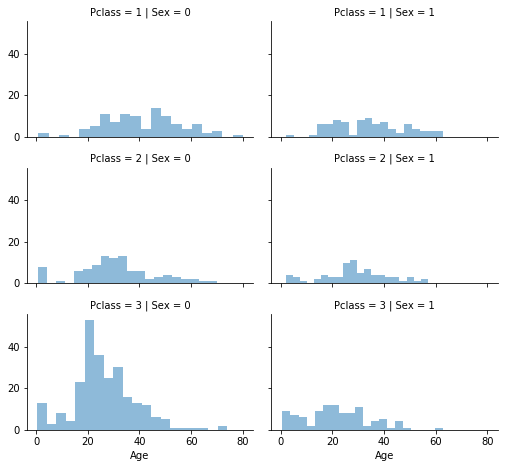

In [22]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

空配列を準備することによって，Pclass x Genderの組み合わせに基づいてAgeの推測値を収容することから始めましょう．[](http://)

In [23]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

ここで，Sex (0 or 1) と Pclass (1, 2, 3) の6通りの組み合わせの中で，Ageの推測値を繰り返し計算します．

In [24]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Ageのまとまりを作成して，Survivedとの相関を判断しましょう．

In [25]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


これらのまとまりから，Ageを順序変数に置き換えましょう．

In [26]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


AgeBandを置き換えることはできません．

In [27]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### 既存の特徴量を組み合わせて，新しい特徴量を作成する

ParchとSibSpを組み合わせて，FamilySizeという新しい特徴量を作成できます．FamilySizeを作成することによって，ParchとSibSpをデータセットから削除することができます．

In [28]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


他の特徴量としてIsAloneを作ることができます．

In [29]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


IsAloneによって置き換えることで，Parch, SibSp, FamilySizeを削除しましょう．

In [30]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


PclassとAgeを結合した人工的な特徴量を作成することもできます．

In [31]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### カテゴリカル変数を補完する

Embarkedは乗船ポートに基づいて S，Q，C という値をとります．trainデータセットは2つの欠損値を持ちます．単純に，欠損値を最も多く発生したものによって埋めます．

In [32]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [33]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### カテゴリカル変数を数値変数に変換する


新しい数値変数Portを作成することによって，EmbarkedFillを変換します．

In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### 数値変数の簡単な補完/変換

Fareの補完を行います．testデータセットの中にある1つの欠損値は，Fareの最頻値(mode)を使って補完できます．この処理をコード1行で行います．

※ 1つの値のみを置き換えるので，中間の新しい特徴量を作成していないこと，および推測された欠損値との相関を追加検証していないことに留意してください．コンペの目標達成には，nullではない値を処理するモデル・アルゴリズムのための前提条件が求められます．

また，Fare(運賃)を，それぞれの通貨を代表する2つの10進概数として扱いたいと思うことでしょう．

In [35]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


新しい特徴量，FareBandを作成しましょう

In [36]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


FareBandに基づいて，Fareを順序変数に変換します．

In [37]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


testデータセットも確認します．

In [38]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## モデル・予測・問題解決

さて，モデルを訓練し，要求された解答を予測するための準備が整いました．選ぶべき予測的モデル・アルゴリズムは60個以上あります．問題と要求される解答のタイプを理解しなければいけません．
これによって，選択されるモデルを，我々が評価できる数少ないもの範疇に狭めることができます．今回の問題は，分類/回帰問題です．我々は，出力(Survived or not)と特徴量(Gender, Age, Port...)との間の関係を特定したいです．
また我々は，教師あり学習と呼ばれる(与えられたデータセットからモデルを学習させる)機械学習のカテゴリーを行ないます．これらの2つの基準 (教師あり学習+分類/回帰) の中で，我々はモデル選択を少しの範囲に狭めることができます．すなわち，以下のモデルです:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [39]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

ロジスティック回帰(Logistic regression)はワークフローの中で簡単に実行できる便利なモデルです．ロジスティック回帰は，ロジスティック関数(累積ロジスティック分布)を使って確率を推定して，従属変数(=カテゴリカル変数)と，いくつかの独立変数との関係を推測します．[Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

※ trainデータセットに基づいてモデルから生成された信頼係数に留意してください．

In [40]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.36

我々は，特徴量の作成と目標達成のための想定/決定を検証するために，ロジスティック回帰(Logistic Regression)を使うことができます．この検証は，決定関数(=モデル)の中で各特徴量の係数を導出することによって行われます．正の係数は，応答変数Survivedのlog-odds(すなわち生起確率)を増加させます．また，負の係数は応答変数Survivedのlog-odds(すなわち生起確率)を減少させます．

- Sexは最も高い正の係数をもち，Sexの値 (male: 0, female: 1) が増加するにしたがって，Survived=1である確率も増加することを示している．
- 逆に，Pclassが増加すると，Sirvived=1である確率は減少する．
- このように，Age*Classは，Survivedとの2番目に高い，負の相関をもつ人工的な良い特徴量．
- 同様にTitleは，Survivedと2番目に高い，正の相関をもつ．

In [41]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287163
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311200
0,Pclass,-0.749006


次に，分類/回帰の分析のために使われるデータを解析する学習アルゴリズムである教師なし学習のモデル，Support Vector Machinesを使って，モデリングを行います．
trainデータサンプルの集合を与えられた場合，これは**2つのカテゴリ**のうちどちらかに分類されます．SVMの訓練アルゴリズムは，新しいtestサンプルを2つのカテゴリのどちらかに選別するようなモデル(非確率的な2クラス線形分類器)を形成します．[Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

※ このモデル(SVM)は，ロジスティック回帰モデルよりも高い信頼スコアを出した．

In [42]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.84

パターン認識の中で，k-近傍法(K-NN)は分類/回帰に使われるノンパラメトリック法です．データサンプルは，隣接点からの過半票によって分類されます．すなわち，サンプルはk個の最近傍隣接点(kは正の整数で，典型的には小さい)の中で，平均的なクラスに割り当てられます．もしk=1ならば，注目サンプルは単に最も近い1つの隣接点のクラスに分類されます．[Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

※ KNNの信頼スコアは，ロジスティック回帰より良く，SVMよりも悪かった．

In [43]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

機械学習の中で，ナイーブベイズ分類器(Naive Bayse classifier)は，特徴量間に強い(ナイーブな)独立性を想定して，ベイズの定理を適用した簡単な確率分類器族です．学習問題において，特徴量(変数)の数に対して，パラメータ数が線形であることを前提とするため，ナイーブベイズ分類器は高い拡張性をもちます．[Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

※ このモデルの信頼スコアは，今まで評価されたモデルの中で，最も低かった．

In [44]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

パーセプトロン(Perceptron)は，2クラス分類のための教師あり学習アルゴリズムです．(入力ベクトルが，ある特定のクラスに属するか否かを決定できる関数を学習する)
これは，重み集合を結合した線形関数と特徴ベクトルから予測を行う，線形分類器，i.e.線形分類アルゴリズムのひとつです．このアルゴリズムでは，(訓練データセットの中で，それぞれの要素を一度に1つずつ処理する)オンライン学習を行うこともできます．[Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [45]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


78.0

In [46]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.12

In [47]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


76.66

このモデルは，特徴量(木の分岐点)を目標変数(木の葉)へ写像させる予測モデルとして，決定木を使います．

目標変数が値として有限集合をもつ場合，決定木は分類木(Classification trees)と呼ばれます．木構造の中で，葉はクラスラベルを表していて，分岐点はクラスラベルにいたる特徴量の連接を表しています．目標変数が連続値(典型的には実数)をもつ場合，決定木は回帰木(Regression trees)と呼ばれます．[Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

※ このモデルの信頼スコアは，今まで評価されてきたモデルの中で最も高かった．

In [48]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

次のモデルであるRandom Forestsは，最も知られたモデルのひとつです．Random Forests (or Random decision forests)は分類/回帰/他のためのアンサンブル学習法です．Random Forestsは訓練時に複数の決定木 (n_estimators=100) を形成して稼働させます．その出力クラスは，そのクラスに対応するモデル(分類)もしくは個々の予測値の平均(回帰)になります．[Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

※ Random Forestsモデルの信頼スコアは，これまでに評価されたモデルの中で最も高かった．よってコンペティションの提出物を作成するために，このモデルの出力(Y_pred)を使うことを決定した．

In [49]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

### モデル評価

我々の問題に対して最善のモデルを選ぶために，すべてのモデルを評価してランク付けします．
決定木(Decision Tree)とランダムフォレスト(Random Forest)のスコアは同じですが，決定木はtrainデータセットに対して過学習しやすいという習慣から，ランダムフォレストを使うことに決めます．

In [50]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
7,Linear SVC,79.12
5,Perceptron,78.00
6,Stochastic Gradient Decent,76.66
4,Naive Bayes,72.28


In [51]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [52]:
# submission.to_csv('../output/submission.csv', index=False)

このノートブックの提出は，コンペティション・サイトKaggleにおいて，6,082エントリーの中で3,883位として記録されます．
この結果はコンペが開催されているかどうかを暗示しています．この結果は，提出されるデータセットの一部のみを占めています．
最初の試みとしては悪くないでしょう．このスコアを改善するための提案はどんなものであれ大歓迎です．

## 参考文献

このノートブックは，Titanicコンペティションを解くために行われてきた偉大な仕事と，外部ソースに基づいて作成されました．

- [A journey through Titanic](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic)
- [Getting Started with Pandas: Kaggle's Titanic Competition](https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests)
- [Titanic Best Working Classifier](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier)